In [132]:
import pandas as pd
import numpy as np
import os
import altair as alt
alt.data_transformers.disable_max_rows()
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt

In [133]:
#cwd
cwd=os.getcwd()

# DESCRIPTION

This is the first part of a two part series. In this piece we will design the A/B. 
test.

This exercise is taken from the Udemy course on [A/B Testing ](https://www.udemy.com/course/ab-testing-in-python), which relates to a social media company Kittengram who will run an A/B test in their website after partnering with an Ads company that focuses on Cat Ads in order to increase their Click Through Rate (CTR). The company provides two dataset 1) Activity Level of Users and 2)CTR, post-processed

# SUMMARY

We evaluated the databases provided and obtained key metrics.  For the Activity level dataset (where activity level >0) had 950875 records, a mean	of 30673 and  std of 91. The CTR dataset had a mean	33% with and  std of 1.7. We observed that the data was too estable to resemble true traffic and could therefore be synthetic data.

We designed an A/B Test to validate that the introduction of ads with cat content would be relevant to the users of kittengram and therefore increase the Click Through Rate (CTR). We also considered monitoring Daily Active Users (DAU) to ensure it remaind estable. We stablished the the Null Hypothesis (H0) to be that no changes could be observed after the introduction of the new ads. 

The key metrics to evaluate the success of the test would be an increase in CTR higher 5% with a desired increase in DUA of 33% of users (91 users). The first KPI should be achievable with 11.8k clicks and the second would take approximately 13 days.If the long extend of the proposed duration (13 days) to achieve 33% of users is not possible, an alternative would be to run it for 2 days to achieve an increase of 10%. 

# DATA EXPLORING

## 1) Activity Level

In [134]:
## Loading the data from a .csv file 
data = pd.read_csv(cwd+"/resources/activity_pretest.csv")
data.head()

,userid,dt,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,0


In [135]:
print(data.describe())
print('\n')
if len(data.columns.values) <10:
    for cols in data.columns.values:
        print(cols)
        print('\n')
        print(data[cols].value_counts().sort_values())
        print('\n')
        print('------------------------')
        print('\n')

       activity_level
count    1.860000e+06
mean     5.243289e+00
std      6.520996e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+01
max      2.000000e+01


userid


a5b70ae7-f07c-4773-9df4-ce112bc9dc48    31
474f5fc6-3375-4eea-a6d6-8df099b45c74    31
92afbe4b-4c92-4023-bd50-f3d24ec802bf    31
5a7ff0fd-7410-4b9b-88d2-b34fec0a791b    31
c4d1cfa8-283d-49ad-a894-90aedc39c798    31
                                        ..
26fbfd61-73cc-480f-8176-8ebac3e2b386    31
2c955b66-27e4-454e-a0d2-f8adc745d806    31
e411e5d4-fb5a-438d-a98e-1a6701abc68a    31
11035ba2-ec17-4c48-a6a5-5f0a01df250c    31
ae570647-3b27-4e1d-9a01-f77b8636c592    31
Name: userid, Length: 60000, dtype: int64


------------------------


dt


2021-10-01    60000
2021-10-04    60000
2021-10-05    60000
2021-10-06    60000
2021-10-07    60000
2021-10-08    60000
2021-10-09    60000
2021-10-10    60000
2021-10-11    60000
2021-10-12    60000
2021-10-13    60000
2021-10-14    60000
20

In [136]:
## Exploring duplicates
data[data["userid"].duplicated()]

,userid,dt,activity_level
29366,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-02,0
29368,eccec621-b2bb-4695-b817-5bc80e35028b,2021-10-02,0
29370,651d007e-4234-48a5-954b-5379e44c4f67,2021-10-02,0
29373,ba7f447a-bc16-4164-8c8d-3cd73dea17b3,2021-10-02,0
29377,aede54f3-1436-4eb9-8148-2df16703cc2d,2021-10-02,0
...,...,...,...
1859995,200d65e6-b1ce-4a47-8c2b-946db5c5a3a0,2021-10-31,20
1859996,535dafe4-de7c-4b56-acf6-aa94f21653bc,2021-10-31,20
1859997,0428ca3c-e666-4ef4-8588-3a2af904a123,2021-10-31,20
1859998,a8cd1579-44d4-48b3-b3d6-47ae5197dbc6,2021-10-31,20


In [137]:
## we can see that the duplication is not as such, simply activity distributed per days
data[data["userid"]=='a8cd1579-44d4-48b3-b3d6-47ae5197dbc6'].groupby('dt').count()

,userid,activity_level
dt,,
2021-10-01,1,1
2021-10-02,1,1
2021-10-03,1,1
2021-10-04,1,1
2021-10-05,1,1
2021-10-06,1,1
2021-10-07,1,1
2021-10-08,1,1
2021-10-09,1,1


In [138]:
graph=data.activity_level.value_counts().sort_index()

0     909125
1      48732
2      49074
3      48659
4      48556
5      49227
6      48901
7      48339
8      48396
9      48820
10     48943
11     48832
12     48911
13     48534
14     48620
15     48599
16     48934
17     48395
18     48982
19     48901
20     24520
Name: activity_level, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

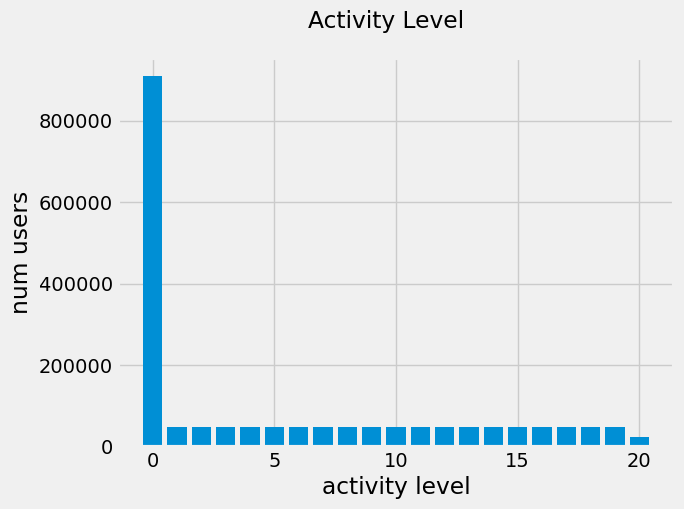

In [261]:
print(graph)
plt.style.use('fivethirtyeight')
plt.suptitle('Activity Level')
plt.xlabel('activity level')
plt.ylabel('num users')
plt.bar(graph.index, graph.values)
plt.show

In [140]:
data.groupby('activity_level').describe().head()

userid                                                    \
                 count unique                                   top freq   
activity_level                                                             
0               909125  60000  6b953416-72e5-4b6e-b634-41c8d3bf98a4   27   
1                48732  33688  3c5297b6-602e-4479-9a97-e2b4cb444f0a    6   
2                49074  33761  3d5b7e5d-d7b8-459b-a4f0-33231fc930fd    6   
3                48659  33634  fd9d8064-2f3f-47ba-9deb-0a38bc0b1a3d    6   
4                48556  33502  dc396a83-174c-4244-8a33-71eae2283eeb    8   

                    dt                            
                 count unique         top   freq  
activity_level                                    
0               909125     31  2021-10-11  29511  
1                48732     31  2021-10-19   1620  
2                49074     31  2021-10-14   1665  
3                48659     31  2021-10-28   1663  
4                48556     31  2021-10-29   1632

### Calculating Daily Active Users (DAU = Activity_level >0)

In [141]:
activity = data.query('activity_level > 0').groupby(['dt', 'activity_level']).count().reset_index()

In [142]:
activity

,dt,activity_level,userid
0,2021-10-01,1,1602
1,2021-10-01,2,1507
2,2021-10-01,3,1587
3,2021-10-01,4,1551
4,2021-10-01,5,1586
...,...,...,...
615,2021-10-31,16,1499
616,2021-10-31,17,1534
617,2021-10-31,18,1531
618,2021-10-31,19,1616


In [143]:
chart1=alt.Chart(activity).mark_line(size=1).encode(
    alt.X('dt:T', axis=alt.Axis(title = 'date')),
    alt.Y('userid:Q', axis=alt.Axis(title = 'number of users')),
    tooltip=['activity_level'], 
    color='activity_level:N'
).properties(
    title='Daily Users per Activity Level'
)

In [144]:
activity = data.query('activity_level > 0').groupby(['dt']).count().reset_index()
activity.describe()

,userid,activity_level
count,31.000000,31.000000
mean,30673.387097,30673.387097
std,90.968375,90.968375
min,30489.000000,30489.000000
25%,30608.000000,30608.000000
50%,30661.000000,30661.000000
75%,30728.500000,30728.500000
max,30902.000000,30902.000000


In [145]:
chart2=alt.Chart(activity).mark_line(size=4).encode(
    alt.X('dt:T', axis=alt.Axis(title = 'date')),
    alt.Y('userid:Q', axis=alt.Axis(title = 'number of users'))
).properties(
    title='Daily Active Users'
)

In [146]:
chart2 | chart1

alt.HConcatChart(...)

### Analyzing data

This data seems surprisingly flat. If this wasn't synthetic data, we would need to understand better why there was such a flat behavior. In that case, more information about the behavior of the app would be needed. Perhaps users are encourage to join N times per day to maintain a certain level or are limited by the times they can log in (Ex. Duolingo)

## 2) Click Through Rate (CTR)

In [147]:
data2 = pd.read_csv(cwd+"/resources/ctr_pretest.csv")
data2.head()

,userid,dt,ctr
0,4b328144-df4b-47b1-a804-09834942dce0,2021-10-01,34.28
1,34ace777-5e9d-40b3-a859-4145d0c35c8d,2021-10-01,34.67
2,8028cccf-19c3-4c0e-b5b2-e707e15d2d83,2021-10-01,34.77
3,652b3c9c-5e29-4bf0-9373-924687b1567e,2021-10-01,35.42
4,45b57434-4666-4b57-9798-35489dc1092a,2021-10-01,35.04


In [148]:
data2.describe()

,ctr
count,950875.000000
mean,33.000242
std,1.731677
min,30.000000
25%,31.500000
50%,33.000000
75%,34.500000
max,36.000000


In [149]:
ctr= data2.groupby(['dt']).mean().reset_index()
ctr

,dt,ctr
0,2021-10-01,32.993446
1,2021-10-02,32.991664
2,2021-10-03,32.995086
3,2021-10-04,32.992995
4,2021-10-05,33.004375
5,2021-10-06,33.018564
6,2021-10-07,32.988500
7,2021-10-08,32.998654
8,2021-10-09,33.005082
9,2021-10-10,33.007134


In [150]:
alt.Chart(ctr).mark_line(size=4).encode(
    alt.X('dt:T', axis=alt.Axis(title = 'date')),
    alt.Y('ctr:Q', axis=alt.Axis(title = 'ctr'), scale=alt.Scale(domain=[32, 34])),
    tooltip=['ctr'], 
).properties(
    width=600,
    height=400, 
    title='Average Daily CTR'
)

alt.Chart(...)

### Benchmarking this data:

- According to Adbraze^1^ a well performing add in Instagram has a CTR over 2% but the average is 0.58%. 
- According to Smart Things^2^, Instagram's CTR averages 22% and for 'Animal & Pets' category, ads CTR averaged 7.62%, Avg. Convertion Rate os 9.43%.

With a 33% rate, our CTR surpasses any of the referencial points. This is likely an error in the data generation as the problem described a poorly performing CTR. 


* [^1^] AdBraze 'Key Instagram metrics to follow in 2022' published on Dec 29, 2022. Reviewed on Marc 23, 2023. Link: https://adbraze.com/blog/key-instagram-benchmarks

* [^2^] Smart Things '' published on Feb 14 2023. Reviewed on Marc 23, 2023. Link: https://www.smartinsights.com/internet-advertising/internet-advertising-analytics/display-advertising-clickthrough-rates/

# DESIGNING THE EXPERIMENT

### Hypothesis & Null Hypothesis

Hypothesis (H1): 
    
    If we include more relevant ads:
        1) CTR should significantly increase as people will be more likely to click the ad
        2) User satisfaction will increase
        3) Higher affiliate revenue


Null Hypothesis (H0): 
    
    There won't be a change by introducing the new ads

### Metrics

**Success metric**: 

    - CTR should increase
    - Daily Active Users is stable or increasing
    
    

**Guardrail metrics:**

    - Customer Satisfaction will increase or remain stable
    - Affiliate Revenue should increase
    - Bounce rate should not increase
    - Retention should not decrease
    - Num. Errors/ Crashes allowed
    
    In the exercise we do not dispose of additional data, so we will be unable to monitor these guardrail metrics. 

### A/B Test set up

**When to start the test:**

Considerations:

    - Current marketing campaigns running?
    - Size of control group available?
    - How many other tests may be scheduled/running?
    - Business restrictions (time, user, risks)?

### Duration and Sample Size

**Minimum Detectable effect (mde):** 

In [241]:
digits=3 #number of relevant digits
mean=round(activity.userid.mean(),digits)
std=round(activity.userid.std(),digits)
mde=round(std/mean, digits)
print(' For DAU: ', '\n','\n',
      'Mean: ',mean, '\n', 
      'Standard Deviation: ', std, '\n',
      'mde: ', mde*100, '%',
     )

 For DAU:  
 
 Mean:  30673.387 
 Standard Deviation:  90.968 
 mde:  0.3 %


In [190]:
digits=4 #number of relevant digits
#divided by 100 as it represents percentage
ctr_mean=round(data2.ctr.mean()/100,digits)
ctr_std=round(data2.ctr.std()/100,digits)
ctr_mde=round(ctr_std/ctr_mean, digits)

print(' For Clickrate: ', '\n','\n',
      'Mean: ',ctr_mean, '\n', 
      'Standard Deviation: ', ctr_std, '\n',
      'mde: ',ctr_mde , '%'
     )

 For Clickrate:  
 
 Mean:  0.33 
 Standard Deviation:  0.0173 
 mde:  0.0524 %


**Statistical Significance level - (P-value or Type I error)** This is the acceptable level of mistakenly rejecting H0 or thinking we see and impact whn there is none. False Positive

In [153]:
alpha=0.05
ss=1-alpha

**Power (Beta or Type II Error)** Thia ia thw levl of mistakenly accepting H0 or thinking we don't have an impaxt when in reality we do. False Negative

Usually 10>Beta>20, with most commonly Beta=20 in digital experiments


In [154]:
beta=0.2
power=(1-beta)

### Sample Size

### What type of test to use:
![Decision Tree](./img/decision_tree.jpg)


In our case:

We need the Z test since CTR is a Binominal/Discrete metric, with a large sample. 

In [207]:
def binomial_sample_size(metric, mde, alpha, beta):
    # standard normal distribution to determine z-values
    snd = stats.norm(0, 1)

    Z_beta = snd.ppf(1-beta)

    Z_alpha = snd.ppf(1-alpha/2)

    # average of probabilities from both groups
    p = (metric + metric+mde) / 2

    N = (2 * p * 
             (1 - p) * 
             ((Z_beta + Z_alpha)**2
             / mde**2))

    return Z_beta, Z_alpha, p, N

In [256]:
#For CTR
name='CTR'
unit='clicks'
metric=ctr_mean
mde=ctr_std
digits=2


(Z_beta, Z_alpha, p, N)=binomial_sample_size(metric=metric, mde=mde, alpha=alpha, beta=beta)
print(' Using: ', '\n', 
      'mean: ', metric, '\n',
      'mde: ' , mde,'\n',
      'alpha: ',alpha,'\n',
      'beta: ',beta, '\n',
      'Z_alpha: ', round(Z_alpha,digits),'\n',
      'Z_beta: ', round(Z_beta,digits),'\n',
      'p: ', round(p,digits),'\n', '\n','Obtained:','\n'
     'N= ', round(N,1),unit
     )

 Using:  
 mean:  0.33 
 mde:  0.0173 
 alpha:  0.05 
 beta:  0.2 
 Z_alpha:  1.96 
 Z_beta:  0.84 
 p:  0.34 
 
 Obtained: 
N=  11747.0 clicks


In [216]:
def continuos_sample_size(metric, mde, sd, alpha, beta):
    # standard normal distribution to determine z-values
    snd = stats.norm(0, 1)

    Z_beta = snd.ppf(1-beta)


    Z_alpha = snd.ppf(1-alpha/2)


    N = (2 * sd**2 * 
             (Z_beta + Z_alpha)**2
             / mde**2)

    return Z_beta, Z_alpha, N

In [257]:
#For DAU
name='DAU'
unit='days'
mde=300



(Z_beta, Z_alpha, N)=continuos_sample_size(metric=metric, mde=mde, sd=std, alpha=alpha, beta=beta)

print(' Using: ', '\n', 
      'U1: ', mean, '\n',
      'mde: ' , mde,'\n',
      'U2: ', mean-mde, '\n',
      'sd: ' , sd,'\n',
      'alpha: ',alpha,'\n',
      'beta: ',beta, '\n',
      '\n',
      '\n','Obtained:','\n',
      'Z_beta: ',round(Z_beta,digits),'\n',
      'Z_alpha: ', round(Z_alpha,digits),'\n',
      '\n','N= ', round(N,1), unit
     )


 Using:  
 U1:  30673.387 
 mde:  300 
 U2:  30373.387 
 sd:  90.968 
 alpha:  0.05 
 beta:  0.2 
 
 
 Obtained: 
 Z_beta:  0.84 
 Z_alpha:  1.96 
 
 N=  1.4 days
